In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng


URL = "https://learnenough.s3.amazonaws.com/titanic.csv"
titanic = pd.read_csv(URL)

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic = pd.read_csv(URL, index_col="Name")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.iloc[0]["Survived"]

0

In [6]:
titanic.iloc[1]["Survived"]

1

In [7]:
titanic["Survived"].mean()

0.3838383838383838

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [9]:
titanic["Pclass"].unique()

array([3, 1, 2])

In [10]:
titanic.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

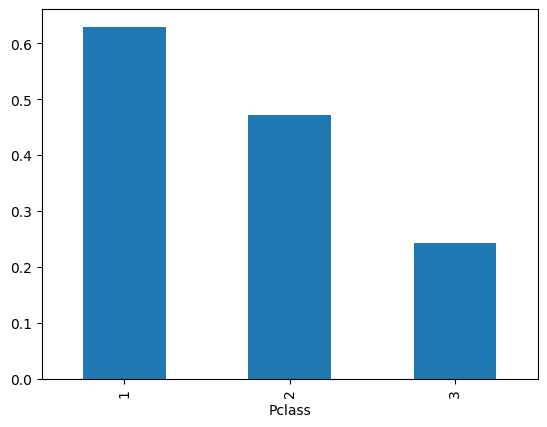

In [11]:
survival_rates = titanic.groupby("Pclass")["Survived"].mean()
survival_rates.plot.bar()
plt.show()

In [12]:
titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

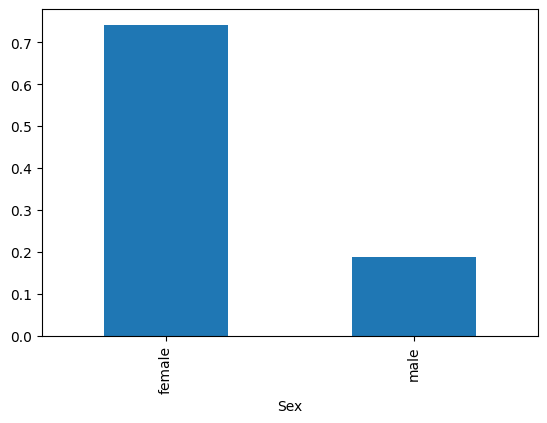

In [13]:
survival_rates = titanic.groupby("Sex")["Survived"].mean()
survival_rates.plot.bar()
plt.subplots_adjust(bottom=0.20)
plt.show()

In [14]:
titanic["Age"].min()

0.42

In [15]:
titanic["Age"].max()

80.0

In [16]:
(titanic["Age"].max() - titanic["Age"].min())/7

11.368571428571428

In [17]:
titanic["Age"].notna()

Name
Braund, Mr. Owen Harris                                 True
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                  True
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
Allen, Mr. William Henry                                True
                                                       ...  
Montvila, Rev. Juozas                                   True
Graham, Miss. Margaret Edith                            True
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                   True
Dooley, Mr. Patrick                                     True
Name: Age, Length: 891, dtype: bool

In [18]:
valid_ages = titanic[titanic["Age"].notna()]

In [19]:
sorted_by_age = valid_ages.sort_values(by="Age")

In [20]:
sorted_by_age["Age range"] = pd.cut(sorted_by_age["Age"], 7)

In [21]:
survival_rates = sorted_by_age.groupby("Age range")["Survived"].mean()

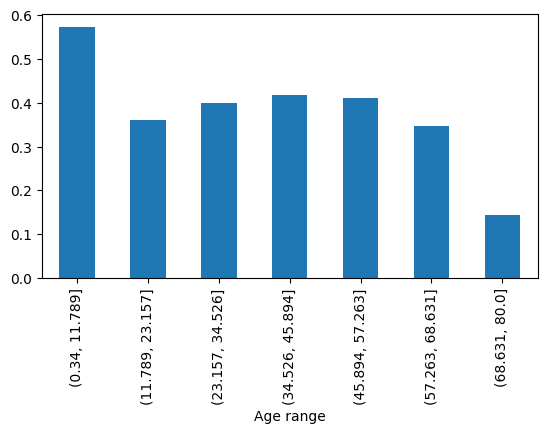

In [22]:
survival_rates.plot.bar()
plt.subplots_adjust(bottom=0.33)
plt.show()

In [23]:
titanic[titanic["Sex"] == "male"]["Age"].mean()

30.72664459161148

In [24]:
titanic[titanic["Sex"] == "female"]["Age"].mean()

27.915708812260537